# McCulloch Pitts Neuron - Deep Learning Building Blocks

   The fundamental block of deep learning is artificial neuron i.e. it takes a weighted aggregate of inputs, applies a function and gives an output. The very first step towards the artificial neuron was taken by Warren McCulloch and Walter Pitts in 1943 inspired by neurobiology, created a model known as McCulloch-Pitts Neuron.

**Disclaimer**: The content and the structure of this article is based on the deep learning lectures from One-Fourth Labs — [Padhai](https://padhai.onefourthlabs.in/).

**Motivation — Biological Neuron**

The inspiration for the creation of an artificial neuron comes from the biological neuron.
<img src='https://github.com/taruntiwarihp/raw_images/blob/master/DL1.png?raw=true'>

                            Fig — 1 Biological Neuron — Padhai Deep Learning
In a simplistic view, neurons receive signals and produce a response. The general structure of a neuron is shown in the Fig-1. Dendrites are the transmission channels to bring inputs from another neuron or another organ. Synapse — Governs the strength of the interaction between the neurons, consider it like weights we use in neural networks. Soma — The processing unit of the neuron.

At the higher level, neuron takes a signal input through the dendrites, process it in the soma and passes the output through the axon (the brown color cable-like structure in the Fig-1).

### McCulloch-Pitts Neuron Model

MP Neuron Model introduced by Warren McCulloch and Walter Pitts in 1943. MP neuron model is also known as linear threshold gate model.

#### Mathematical Model
<img src='https://github.com/taruntiwarihp/raw_images/blob/master/DL2.png?raw=true'>
                        Fig — 2 Simple representation of MP Neuron Model
                        
The function (soma) is actually split into two parts: **g** — The aggregates the inputs to a single numeric value and the function **f** produces the output of this neuron by taking the output of the **g** as the input i,e.. a single value as its argument. The function **f** will output the value 1 if the aggregation performed by the function **g** is greater than some threshold else it will return 0.

The inputs x1, x2, ….. xn for the MP Neuron can only take boolean values and the inputs can be inhibitory or excitatory. Inhibitory inputs can have maximum effect on the decision-making process of the model. In some cases, inhibitory inputs can influence the final outcome of the model.

<img src='https://github.com/taruntiwarihp/raw_images/blob/master/DL3.png?raw=true'>

                                Fig — 3 Mathematical representation
For example, I can predict my own decision of whether I would like to watch a movie in a nearby IMAX theater tomorrow or not using an MP Neuron Model. All the inputs to the model are boolean i.e., [0,1] and from the Fig — 2 we can see that output from the model will also be boolean. (0 — Not going to movie, 1 — going to the movie)

Inputs for the above problem could be

* x1 — IsRainingTomorrow (Whether it's going to rain tomorrow or not)
* x2 — IsScifiMovie (I like science fiction movies)
* x3 — IsSickTomorrow (Whether I am going to be sick tomorrow or not depends on any symptoms, eg: fever)
* x4 — IsDirectedByNolan (Movie directed by Christopher Nolan or not.) etc….

In this scenario, if x3 — IsSickTomorrow is equal to 1, then the output will always be 0. If I am not feeling well on the day of the movie then no matter whoever is the actor or director of the movie, I wouldn’t be going for a movie.

### Loss Function
Let's take an example of buying a phone based on some features of the features in the binary format. { y — 0: Not buying a phone and y — 1: buying a phone}
<img src='https://github.com/taruntiwarihp/raw_images/blob/master/DL4.png?raw=true'>

                                        Fig — 4: Buying a phone
For each particular phone (observation) with a certain threshold value **b**, using the MP Neuron Model, we can predict the outcome using a condition that the summation of the inputs is greater than b then the predicted value will be 1 or else it will be 0. The loss for the particular observation will be squared difference between the Yactual and Ypredicted.

<img src='https://github.com/taruntiwarihp/raw_images/blob/master/DL5.png?raw=true'>

                            Fig — 5: MP Neuron Model for Buying a phone
Similarly, for all the observations, calculate the summation of the squared difference between the Yactual and Ypredicted to get the total loss of the model for a particular threshold value **b**.

<img src='https://github.com/taruntiwarihp/raw_images/blob/master/DL6.png?raw=true'>

                                Fig — 6: Loss of the Model
### Learning Algorithm

The purpose of the learning algorithm is to find out the best value for the parameter **b** so that the loss of the model will be minimum. In the ideal scenario, the loss of the model for the best value of **b** would be zero.

For n features in the data, the summation we are computing in Fig — 5 can take only values between 0 and n because all of our inputs are binary (0 or 1). 0 — indicates all the features described in the Fig — 4 are off and 1 — indicates all the features are on. Therefore the different values the threshold b can take will also vary from 0 to n. As we have only one parameter with a range of values 0 to n, we can use the brute force approach to find the best value of b.

Initialize the b with a random integer [0,n]
For each observation
Find the predicted outcome, by using the formula in Fig — 5
Calculate the summation of inputs and check whether its greater than or equal to b. If its greater than or equal to b, then the predicted outcome will be 1 or else it will be 0.

After finding the predicting outcome compute the loss for each observation.
Finally, compute the total loss of the model by summing up all the individual losses.
Similarly, we can iterate over all the possible values of b and find the total loss of the model. Then we can choose the value of b, such that the loss is minimum.

### Model Evaluation

After finding the best threshold value b from the learning algorithm, we can evaluate the model on the test data by comparing the predicted outcome and the actual outcome.

<img src='https://github.com/taruntiwarihp/raw_images/blob/master/DL7.png?raw=true'>

                    Fig — 7: Predictions on the test data for b = 5
For evaluation, we will calculate the accuracy score of the model.

<img src='https://github.com/taruntiwarihp/raw_images/blob/master/DL8.png?raw=true'>

                            Fig — 8: Accuracy metric
For the above-shown test data, the accuracy of the MP neuron model = 75%.

### Python Implementation of MP Neuron Model

In this section, we will see how to implement MP neuron model using python. The data set we will be using is breast cancer data set from sklearn. Before start building the MP Neuron Model. We will start by loading the data and separating the response and target variables.

Once we load the data, we can use the sklearn’s train_test_split function to split the data into two parts — training and testing in the ratio of 80:20.

IMPORTANT:

1. There are two alternate ways to writing the perceptron function:
    w2x2 + w1x1 >= b
    w2x2 + w1x1 + w0 >=0

2. By comparing the two expressions, it's easy to see that wo=-b

3. We will now focus on the second form w2x2 + w1x1 + w0 >=0 or w2x2 +w1x1 + w0x0 >=0 where x0=1

4. Where y_pred=0 and y=1, the update rule is 

    w = w+x, which expands to 
    w2 = w2 + x2
    w1 = w1 + x1
    w0 = w0 + x0 ==> w0 = w0 + 1 ==> -b = -b + 1 ==> b = b - 1
   
5. When y_pred = 1 and y = 0, the update rule is 
    w = w - x, which expands to 
    w2 = w2 - x2
    w1= w1 - x1
    w0 = w0 - x- ==> w0 = w0 - 1 ==> -b = -b - 1 ==> b = b + 1
  
6. Note the difference in signs for the updates of w(w1, w2) and b.


In [1]:
# importing packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.datasets

In [2]:
# reading Breast Cancer Dataset
breast_cancer = sklearn.datasets.load_breast_cancer()

* X as set of features and y as class label
* In this case we looking for primary classification problem wheather a particular tissue is malignant and benign
    * Malignant means it has cancerous nature
    * Benign means it does't has cancer

In [3]:
x = breast_cancer.data
y = breast_cancer.target

In [4]:
print(x) # contains the series of data items(each such rows contains features)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [5]:
print(y) # contians 0s and 1s(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [6]:
print(x.shape, y.shape)

(569, 30) (569,)


In [7]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [8]:
data['class'] = breast_cancer.target

In [9]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [12]:
print(breast_cancer.target_names)

['malignant' 'benign']


* malignant has 357 entries
* benign has 212 entries
* With cancer has more than without cancer

In [13]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = data.drop('class', axis=1)
y = data['class']

In [16]:
type(x)

pandas.core.frame.DataFrame

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1)

In [18]:
print(x.shape, X_train.shape, X_test.shape)

(569, 30) (512, 30) (57, 30)


In [19]:
print(y.shape, Y_train.shape, Y_test.shape)

(569,) (512,) (57,)


In [20]:
print(y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.619140625 0.7017543859649122


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, stratify = y)

In [22]:
print(y.mean(), Y_train.mean(), Y_test.mean()) # now ratio is maintained of malignant and benign

0.6274165202108963 0.626953125 0.631578947368421


In [23]:
print(x.mean(), X_train.mean(), X_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, stratify = y, random_state=1)

In [25]:
print(X_train.mean(), X_test.mean(),x.mean())

mean radius                 14.058656
mean texture                19.309668
mean perimeter              91.530488
mean area                  648.097266
mean smoothness              0.096568
mean compactness             0.105144
mean concavity               0.089342
mean concave points          0.048892
mean symmetry                0.181961
mean fractal dimension       0.062979
radius error                 0.403659
texture error                1.206856
perimeter error              2.861173
area error                  39.935506
smoothness error             0.007067
compactness error            0.025681
concavity error              0.032328
concave points error         0.011963
symmetry error               0.020584
fractal dimension error      0.003815
worst radius                16.194275
worst texture               25.644902
worst perimeter            106.757715
worst area                 871.647852
worst smoothness             0.132592
worst compactness            0.257415
worst concav

### Binarisation of input

In [26]:
import matplotlib.pyplot as plt

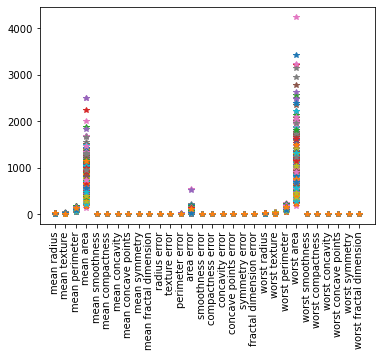

In [27]:
plt.plot(X_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [28]:
x_binarised_3_train = X_train['mean area'].map(lambda x: 0 if x < 1000 else 1)

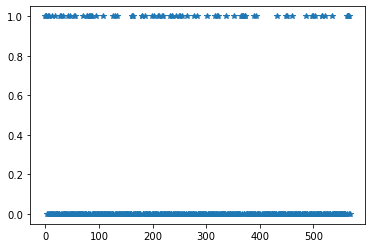

In [29]:
plt.plot(x_binarised_3_train, '*')

In [30]:
x_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

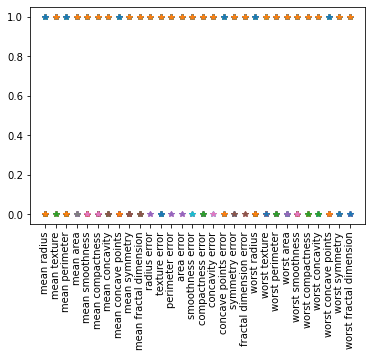

In [31]:
plt.plot(x_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [32]:
x_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [33]:
type(x_binarised_test)

pandas.core.frame.DataFrame

In [34]:
x_binarised_test = x_binarised_test.values
x_binarised_train = x_binarised_train.values

In [35]:
type(x_binarised_train)

numpy.ndarray

### MP neuron model

In [36]:
from random import randint

In [37]:
b = 3

i = randint(0, x_binarised_train.shape[0])

print("For row", i)

if (np.sum(x_binarised_train[100, :]) >= b):
    print("MP Neuron inference is malignant")
else:
    print("MP Neuron inference is benign")

if (Y_train[i] == 1):
    print("Ground Truth is malignant")
else:
    print("Ground truth is benign")

For row 116
MP Neuron inference is malignant
Ground Truth is malignant


In [38]:
b = 3

Y_pred_train = []
accurate_rows = 0

for x, y in zip(x_binarised_train, Y_train):
    y_pred = (np.sum(x) >= b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

print(accurate_rows, accurate_rows/x_binarised_train.shape[0])

321 0.626953125


In [39]:
for b in range(x_binarised_train.shape[1] + 1):
    Y_pred_train = []
    accurate_rows = 0

    for x, y in zip(x_binarised_train, Y_train):
        y_pred = (np.sum(x) >= b)
        Y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows, accurate_rows/x_binarised_train.shape[0])

0 321 0.626953125
1 321 0.626953125
2 321 0.626953125
3 321 0.626953125
4 321 0.626953125
5 321 0.626953125
6 321 0.626953125
7 321 0.626953125
8 321 0.626953125
9 321 0.626953125
10 321 0.626953125
11 321 0.626953125
12 321 0.626953125
13 321 0.626953125
14 323 0.630859375
15 324 0.6328125
16 329 0.642578125
17 332 0.6484375
18 336 0.65625
19 340 0.6640625
20 344 0.671875
21 352 0.6875
22 359 0.701171875
23 371 0.724609375
24 387 0.755859375
25 402 0.78515625
26 419 0.818359375
27 433 0.845703125
28 435 0.849609375
29 417 0.814453125
30 389 0.759765625


In [40]:
# Accuracy seems has to be most at b = 28

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
b = 28 

Y_pred_test = []

for x in x_binarised_test:
    y_pred = (np.sum(x) >= b)
    Y_pred_test.append(y_pred)
    
accuracy = accuracy_score(Y_pred_test, Y_test)
print(b,accuracy)

28 0.7894736842105263


Remember from our previous discussion, MP Neuron takes only binary values as the input. So we need to convert the continuous features into binary format. To achieve this, we will use pandas.cut function to split all the features into 0 or 1 in one single shot. Once we are ready with the inputs we need to build the model, train it on the training data and evaluate the model performance on the test data.

To create a MP Neuron Model we will create a class and inside this class, we will have three different functions:

* model function — to calculate the summation of the Binarized inputs.
* predict function — to predict the outcome for every observation in the data.
* fit function — the fit function iterates over all the possible values of the threshold b and find the best value of b, such that the loss will be minimum

### MP Neuron Class

In [43]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
    
    def model(self, x):
        return(sum(x) >= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        accuracy = {}
        
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
        
        best_b = max(accuracy,key = accuracy.get)
        self.b = best_b
        
        print('Optimal Value of  is', best_b)
        print('Highest accuracy is',accuracy[best_b])

In [44]:
mp_neuron = MPNeuron()
mp_neuron.fit(x_binarised_train, Y_train)

Optimal Value of  is 28
Highest accuracy is 0.849609375


In [45]:
Y_test_pred = mp_neuron.predict(x_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

In [46]:
print(accuracy_test)

0.7894736842105263


After building the model, test the model performance on the testing data and check the training data accuracy as well as the testing data accuracy.

### Problems with MP Neuron Model
* Boolean Inputs.
* Boolean Outputs.
* Threshold b can take only a few possible values.
* All the inputs to the model have equal weights.

### Summary
We looked at the working of MP Neuron Model and its analogy towards biological neuron. In the end, we also saw the implementation of MP Neuron Model using python and a real word breast cancer data set.